In [13]:
!git clone https://github.com/DariusAf/MesoNet

fatal: destination path 'MesoNet' already exists and is not an empty directory.


In [3]:
import numpy as np
# import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Reshape, Concatenate, LeakyReLU
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

ImportError: cannot import name 'broadcast_to' from 'numpy.lib.stride_tricks' (c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\stride_tricks.py)

In [4]:
#Image dimensions standardisation
image_dimensions={'height':256,'width':256,'channels':3}

In [5]:
#Wrapper class for model
class Classifier:
    def __init__():
        self.model = 0

    def predict(self, x):
        if x.size == 0:
            return []
        return self.model.predict(x)

    def fit(self, x, y):
        return self.model.train_on_batch(x, y)

    def get_accuracy(self, x, y):
        return self.model.test_on_batch(x, y)

    def load(self, path):
        self.model.load_weights(path)

In [6]:
class Meso4(Classifier):
  #Initiialising the class
    def __init__(self, learning_rate = 0.001):
        self.model = self.init_model()
        optimizer = Adam(learning_rate = learning_rate)
        self.model.compile(optimizer = optimizer, loss = 'mean_squared_error', metrics = ['accuracy'])

    def init_model(self):
      #Input Layer
        x = Input(shape = (image_dimensions['height'], image_dimensions['width'], image_dimensions['channels']))

#4 convolutional blocks
        x1 = Conv2D(8, (3, 3), padding='same', activation = 'relu')(x)
        x1 = BatchNormalization()(x1)
        x1 = MaxPooling2D(pool_size=(2, 2), padding='same')(x1)

        x2 = Conv2D(8, (5, 5), padding='same', activation = 'relu')(x1)
        x2 = BatchNormalization()(x2)
        x2 = MaxPooling2D(pool_size=(2, 2), padding='same')(x2)

        x3 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x2)
        x3 = BatchNormalization()(x3)
        x3 = MaxPooling2D(pool_size=(2, 2), padding='same')(x3)

        x4 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x3)
        x4 = BatchNormalization()(x4)
        x4 = MaxPooling2D(pool_size=(4, 4), padding='same')(x4)

        y = Flatten()(x4)
        y = Dropout(0.5)(y)
        y = Dense(16)(y)
        y = LeakyReLU(negative_slope=0.1)(y)
        y = Dropout(0.5)(y)
        y = Dense(1, activation = 'sigmoid')(y)

        return Model(inputs = x, outputs = y)






In [7]:
#Initializing model and loading weights
model=Meso4()
model.load("/content/MesoNet/weights/Meso4_DF.h5")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step
Predictions: [[0.9897476]]


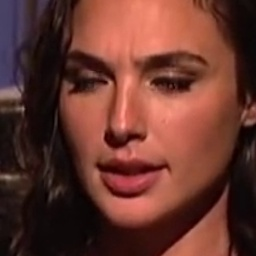

In [ ]:
import cv2

# Function to preprocess the image
def preprocess_image(image_path, target_size=(256, 256)):
    # Read the image
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Image at path {image_path} could not be loaded.")

    # Convert BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Resize the image to match model input
    img = cv2.resize(img, target_size)

    # Normalize the image
    img = img.astype('float32') / 255.0

    # Expand dimensions to match model input shape
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    return img
# Function to make predictions
def predict(image_path, model):
    # Preprocess the image
    preprocessed_image = preprocess_image(image_path)

    # Make predictions
    predictions = model.predict(preprocessed_image)

    return predictions
image_path = '/content/MesoNet/test_images/real/real00240.jpg'  # Update with the path to your test image
predictions = predict(image_path, model)

# Display results
print(f"Predictions: {predictions}")

# To display the image with OpenCV (optional)
img = cv2.imread(image_path)
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
! pip install gdown

In [8]:
import gdown
url = 'https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL'
output = 'data.zip'
gdown.download(url, output, quiet=False)
gdown.extractall('data.zip')

Downloading...
From (original): https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL
From (redirected): https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL&confirm=t&uuid=9f7b463a-c577-47b6-8f1d-df091f99e660
To: /content/data.zip
100%|██████████| 423M/423M [00:07<00:00, 58.7MB/s]


['data/',
 'data/alignments/',
 'data/alignments/s1/',
 'data/alignments/s1/bbaf2n.align',
 'data/alignments/s1/bbaf3s.align',
 'data/alignments/s1/bbaf4p.align',
 'data/alignments/s1/bbaf5a.align',
 'data/alignments/s1/bbal6n.align',
 'data/alignments/s1/bbal7s.align',
 'data/alignments/s1/bbal8p.align',
 'data/alignments/s1/bbal9a.align',
 'data/alignments/s1/bbas1s.align',
 'data/alignments/s1/bbas2p.align',
 'data/alignments/s1/bbas3a.align',
 'data/alignments/s1/bbaszn.align',
 'data/alignments/s1/bbaz4n.align',
 'data/alignments/s1/bbaz5s.align',
 'data/alignments/s1/bbaz6p.align',
 'data/alignments/s1/bbaz7a.align',
 'data/alignments/s1/bbbf6n.align',
 'data/alignments/s1/bbbf7s.align',
 'data/alignments/s1/bbbf8p.align',
 'data/alignments/s1/bbbf9a.align',
 'data/alignments/s1/bbbm1s.align',
 'data/alignments/s1/bbbm2p.align',
 'data/alignments/s1/bbbm3a.align',
 'data/alignments/s1/bbbmzn.align',
 'data/alignments/s1/bbbs4n.align',
 'data/alignments/s1/bbbs5s.align',
 'data/al

In [11]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
sum=0
list_of_predictions=[]
# Function to preprocess the image
def preprocess_image(image, target_size=(256, 256)):
    # Convert BGR to RGB
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Resize the image to match model input
    img = cv2.resize(img, target_size)

    # Normalize the image
    img = img.astype('float32') / 255.0

    # Expand dimensions to match model input shape
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    return img

# Open the video file
video_path = '/content/data/s1/bbal8p.mpg'  # Update with the path to your video file
cap = cv2.VideoCapture(video_path)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Preprocess the frame
    preprocessed_frame = preprocess_image(frame)

    # Make predictions
    predictions = model.predict(preprocessed_frame)

    # Display predictions on the frame
    label = f"Prediction: {predictions[0][0]:.2f}"
    list_of_predictions.append(predictions[0][0])
    print(label)

    cv2.putText(frame, label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

    # Display the frame


    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
for i in list_of_predictions:
  sum+=i
if sum/len(list_of_predictions)>0.5:
  print("REAL VIDEO")
else:
  print("Fake Video")
# Release resources
cap.release()
cv2.destroyAllWindows()


In [10]:
list_of_predictions

[0.91430306,
 0.91358024,
 0.9201165,
 0.9262819,
 0.9192391,
 0.916207,
 0.9225362,
 0.9252373,
 0.9235007,
 0.91238105,
 0.9123338,
 0.9186162,
 0.9143237,
 0.9249099,
 0.9289184,
 0.9252016,
 0.92477286,
 0.93033123,
 0.9249736,
 0.93268645,
 0.929614,
 0.93399346,
 0.92968017,
 0.9331363,
 0.9094858,
 0.9043834,
 0.9249756,
 0.92409587,
 0.92589504,
 0.9231846,
 0.9114381,
 0.9278787,
 0.9336387,
 0.9303804,
 0.92894554,
 0.92022794,
 0.8921114,
 0.9053664,
 0.9140479,
 0.9006634,
 0.9216371,
 0.9187677,
 0.91276926,
 0.89405465,
 0.90312487,
 0.9128213,
 0.9213788,
 0.92455393,
 0.9238855,
 0.92127067,
 0.9276473,
 0.93511605,
 0.93206996,
 0.94674045,
 0.9458961,
 0.946902,
 0.943616,
 0.94645786,
 0.94118696,
 0.9447694,
 0.9442943,
 0.9494834,
 0.9461788,
 0.94610435,
 0.9394418,
 0.93963766,
 0.9367501,
 0.9337895,
 0.9408654,
 0.9460739,
 0.94356805,
 0.94138116,
 0.92398834,
 0.937241,
 0.93223083]